In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mydata=pd.read_csv('housing_data.csv')

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
mydata.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [9]:
missing_cols=mydata.columns[mydata.isnull().any()]

In [14]:
missing_cols

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
missing_cols_data=mydata[missing_cols]

In [11]:
missing_cols_data.head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [16]:
missing_data_sum=missing_cols_data.isnull().sum()

In [33]:
gt=missing_data_sum.index[(missing_data_sum/len(mydata))>0.5]

In [38]:
gt

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [36]:
mydata.drop(gt,axis=1,inplace=True)

In [39]:
def missing_col(data,percentage):
    missing_cols=data.columns[data.isnull().any()]
    missing_cols_data=data[missing_cols]
    more_col=missing_data_sum.index[(missing_cols_data.isnull().sum()/len(data))>percentage]
    return more_col

In [40]:
missing_cols=mydata.columns[mydata.isnull().any()]

In [41]:
new_data=mydata[missing_cols]

In [43]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
LotFrontage     1201 non-null float64
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


In [45]:
numeric_data=new_data.select_dtypes(include='float64')

In [63]:
ordinal_data=new_data.select_dtypes(exclude='float64')

In [ ]:
mydata.fillna()

In [69]:
for x in numeric_data.columns:
    mydata[x].fillna(np.mean(numeric_data[x]),inplace=True)

In [58]:
ordinal_data['MasVnrType'].value_counts().index[0]

'None'

In [70]:
for x in ordinal_data.columns:
    mydata[x].fillna(ordinal_data[x].value_counts().index[0],inplace=True)

In [73]:
mydata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


**Data Transformation** 

In [75]:
mydata.dtypes.value_counts()

object     39
int64      35
float64     3
dtype: int64

In [76]:
ordinal=mydata.select_dtypes(include='object')

In [77]:
numeric=mydata.select_dtypes(exclude='object')

In [79]:
import sklearn.preprocessing as pre

In [80]:
le=pre.LabelEncoder()

In [81]:
for x in ordinal.columns:
    ordinal[x]=le.fit_transform(ordinal[x])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
ordinal

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,2,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,4,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,4,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,4,1,1,4,4,2,8,4
5,3,1,0,3,0,4,0,11,2,2,...,3,6,2,1,2,4,4,2,8,4
6,3,1,3,3,0,4,0,21,2,2,...,2,6,2,1,1,4,4,2,8,4
7,3,1,0,3,0,0,0,14,4,2,...,3,6,4,1,1,4,4,2,8,4
8,4,1,3,3,0,4,0,17,0,2,...,3,2,4,5,2,1,4,2,8,0
9,3,1,3,3,0,0,0,3,0,0,...,3,6,4,1,1,2,4,2,8,4


In [84]:
PCA_housing_preprocessed=pd.concat([numeric,ordinal],axis=1)

In [85]:
PCA_housing_preprocessed.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2,6,2,1,1,4,4,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,3,6,4,1,1,4,4,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2,6,4,1,1,4,4,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2,6,2,5,2,4,4,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2,6,4,1,1,4,4,2,8,4


In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(PCA_housing_preprocessed)
pcadata = scaler.transform(PCA_housing_preprocessed)

In [89]:
pcadata[0]

array([-1.73086488,  0.07337496, -0.22937175, -0.20714171,  0.65147924,
       -0.51719981,  1.05099379,  0.87866809,  0.51141841,  0.57542484,
       -0.28865283, -0.94459061, -0.45930254, -0.79343379,  1.16185159,
       -0.12024172,  0.37033344,  1.10781015, -0.24106104,  0.78974052,
        1.22758538,  0.16377912, -0.21145358,  0.91220977, -0.95122649,
        1.02115667,  0.31172464,  0.35100032, -0.75217584,  0.21650316,
       -0.3593249 , -0.11633929, -0.27020835, -0.06869175, -0.08768781,
       -1.5991111 ,  0.13877749,  0.34727322, -0.04553194,  0.06423821,
        0.75073056,  0.31466687, -0.02618016,  0.60466978, -0.22571613,
       -1.20621453, -0.03628912, -0.03174026, -0.41169079,  1.02668924,
       -0.49151573, -0.12579688,  0.74309239,  0.75162623, -1.24144933,
       -0.77797579,  0.36420746,  0.83559903, -0.32415236,  0.2810478 ,
        0.62891184, -0.42991839,  0.3073151 , -0.12304604, -0.88465767,
        0.26381257,  0.30240343, -0.40936914,  0.25597761, -0.43

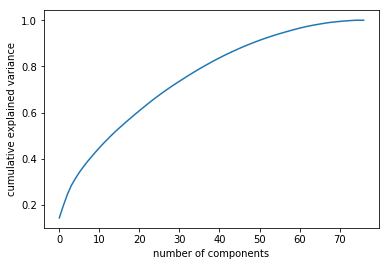

In [90]:
from sklearn.decomposition import PCA
pca = PCA().fit(pcadata)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [91]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=43)
Y_sklearn = sklearn_pca.fit_transform(pcadata)

In [92]:
Y_sklearn

array([[ 2.1468466 , -0.0499016 , -1.94820262, ..., -0.4427092 ,
         0.17748381, -0.74534502],
       [ 0.26052206, -1.58576624,  1.80182866, ...,  0.2460958 ,
         0.55590672, -0.42969914],
       [ 2.69728253, -0.07515218, -1.34764213, ...,  0.0281952 ,
        -0.67715216, -0.47241711],
       ...,
       [ 1.55770633,  2.79147107, -0.11142108, ..., -0.17606345,
         0.88096324, -0.26711042],
       [-3.01812098, -2.37775308,  2.41416686, ...,  1.35394007,
        -0.02324958,  0.53030623],
       [-0.89730034, -2.29161185,  2.09482408, ..., -0.91799604,
         0.45716431, -0.80026914]])

In [94]:
PM=plt.imread('modi in cave.jpg')

In [97]:
PM.shape

(371, 660, 3)

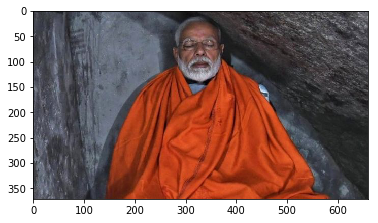

In [98]:
plt.imshow(PM)
plt.show()

In [99]:
import cv2
gray = cv2.cvtColor(PM, cv2.COLOR_BGR2GRAY)

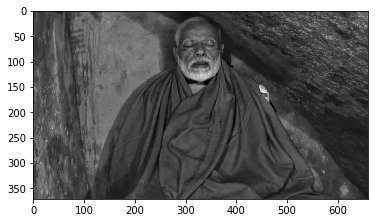

In [102]:
plt.imshow(gray, cmap='gray')
plt.show()

In [130]:
import sklearn.decomposition as de
pca = de.PCA(n_components=35,svd_solver='auto').fit(gray)

In [131]:
img_c = pca.transform(gray)

In [110]:
img_c.shape

(371, 10)

In [134]:
temp = pca.inverse_transform(img_c) 
print(temp.shape) 

(371, 660)


0.9225020888076334


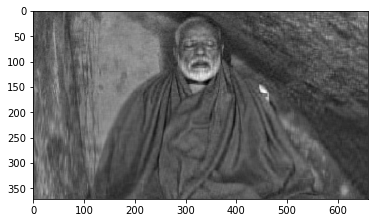

In [135]:
plt.imshow(temp, cmap='gray')
print(np.sum(pca.explained_variance_ratio_))
plt.show()

In [140]:
plt.imsave('PCA_PM',temp,cmap='gray')